In [1]:
from nsaba import Nsaba
from nsaba import analysis
import os
%matplotlib inline

In [2]:
data_dir = "../../data_dir"

In [3]:
# loading class DataFrames
Nsaba.aba_load(data_dir)
Nsaba.ns_load(data_dir)

This may take a minute or two ...
SampleAnnot.csv loaded.
MicroarrayExpression.csv loaded.
Probes.csv loaded.
Nsaba.aba['mni_coords'] initialized.

This may take a minute or two ...
database.txt loaded.
features.txt loaded.
Nsaba.ns['mni_coords'] initialized.



0

In [4]:
# Intializing instance and loading gene expression
tsaba = Nsaba()
tsaba.load_ge_pickle(path=data_dir)

This may take a minute or two ...
'ge' dictionary successfully loaded


In [5]:
term = 'reward'
tsaba.is_term(term)

True

In [6]:
tsaba.get_ns_act(term, thresh=-1)

This may take a few minutes...


In [7]:
anal = analysis.NsabaAnalysis(tsaba)

To use seaborn plotting functionality in Jupyter, '%matplotlib inline' must be enabled


t-value: -5.7401 
p-value: 1.297E-08
Effect size: -0.5386 



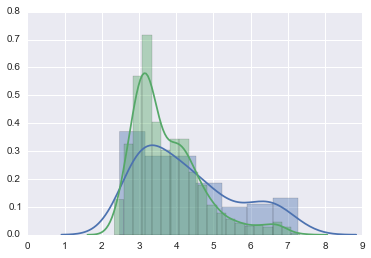

In [8]:
anal.t_test('reward', 1813 , 85)

In [9]:
ttest_metr = anal.t_test_multi('reward')

This may take a couple of minutes ...


In [10]:
anal.fetch_gene_descriptions(ttest_metr)

Fetching NIH gene descriptions ...
374467 isn't registered with the NIH

Corrected Bonferroni Alpha: 2.405E-06


3169 (p = 6.355E-13; d = -0.686): This gene encodes a member of the forkhead class of DNA-binding proteins. These hepatocyte nuclear factors are transcriptional activators for liver-specific transcripts such as albumin and transthyretin, and they also interact with chromatin. Similar family members in mice have roles in the regulation of metabolism and in the differentiation of the pancreas and liver. [provided by RefSeq, Jul 2008]


5445 (p = 3.014E-11; d = -0.632): < No description found >


25890 (p = 6.682E-11; d = -0.620): < No description found >


253970 (p = 6.935E-11; d = -0.620): < No description found >


23620 (p = 9.524E-11; d = -0.615): The protein encoded by this gene belongs to the G protein-coupled receptor family that activate a phosphatidylinositol-calcium second messenger system. Binding and pharmacological studies demonstrate that this receptor binds neu

Percent Significant (Bonferroni Correction; alpha = .05): 0.736 %


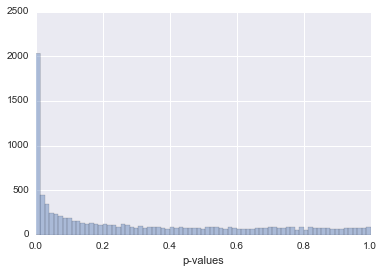

In [11]:
anal.p_val_distr(ttest_metr)

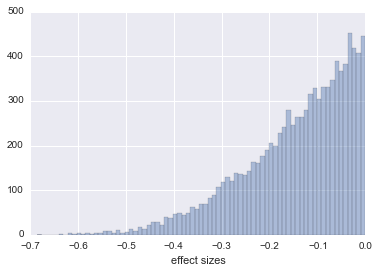

In [12]:
anal.effect_size_distr(ttest_metr)